In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [10]:
vendas = pd.read_csv(r'C:\Users\VictorCampos\Alura\Formacao_Data_Science-Python\DataViz\bases\relatorio_vendas.csv')
vendas.head()

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


In [11]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   data_pedido          8940 non-null   object 
 1   data_envio           8940 non-null   object 
 2   modo_envio           8940 non-null   object 
 3   nome_cliente         8940 non-null   object 
 4   segmento_cliente     8940 non-null   object 
 5   cidade               8940 non-null   object 
 6   estado               8940 non-null   object 
 7   regiao               8940 non-null   object 
 8   departamento         8940 non-null   object 
 9   tipo_produto         8940 non-null   object 
 10  preco_base           8940 non-null   float64
 11  preco_unit_sem_desc  8940 non-null   float64
 12  desconto             8940 non-null   float64
 13  preco_unit_venda     8940 non-null   float64
 14  quantidade           8940 non-null   int64  
 15  vendas               8940 non-null   f

In [12]:
# datetime convert
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format='%Y-%m-%d')
vendas['data_envio'] = pd.to_datetime(vendas['data_envio'], format='%Y-%m-%d')

In [13]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

__Questionamentos__  

Depois de visualizar os dados que temos de maneira rápida, vamos partir para análises baseadas em questionamentos respondidos através desses dados.

1. Qual o total de vendas por ano? E qual ano performou melhor em nossa base de dados?  
2. Qual é o top 7 produtos que mais apresentaram lucros em nosso catálogo durante o período representado?  
3. Se separarmos o total de vendas por ano por regiões? O que conseguimos observar em nossos dados?  
4. Qual o modo de envio mais utilizado pelos clientes da loja? É proporcional para B2B e B2C?  
5. Qual o total de vendas por trimestre do estado de São Paulo?  
6. Qual o faturamento por trimestre em cada região?  

In [100]:
import warnings
warnings.filterwarnings('ignore')

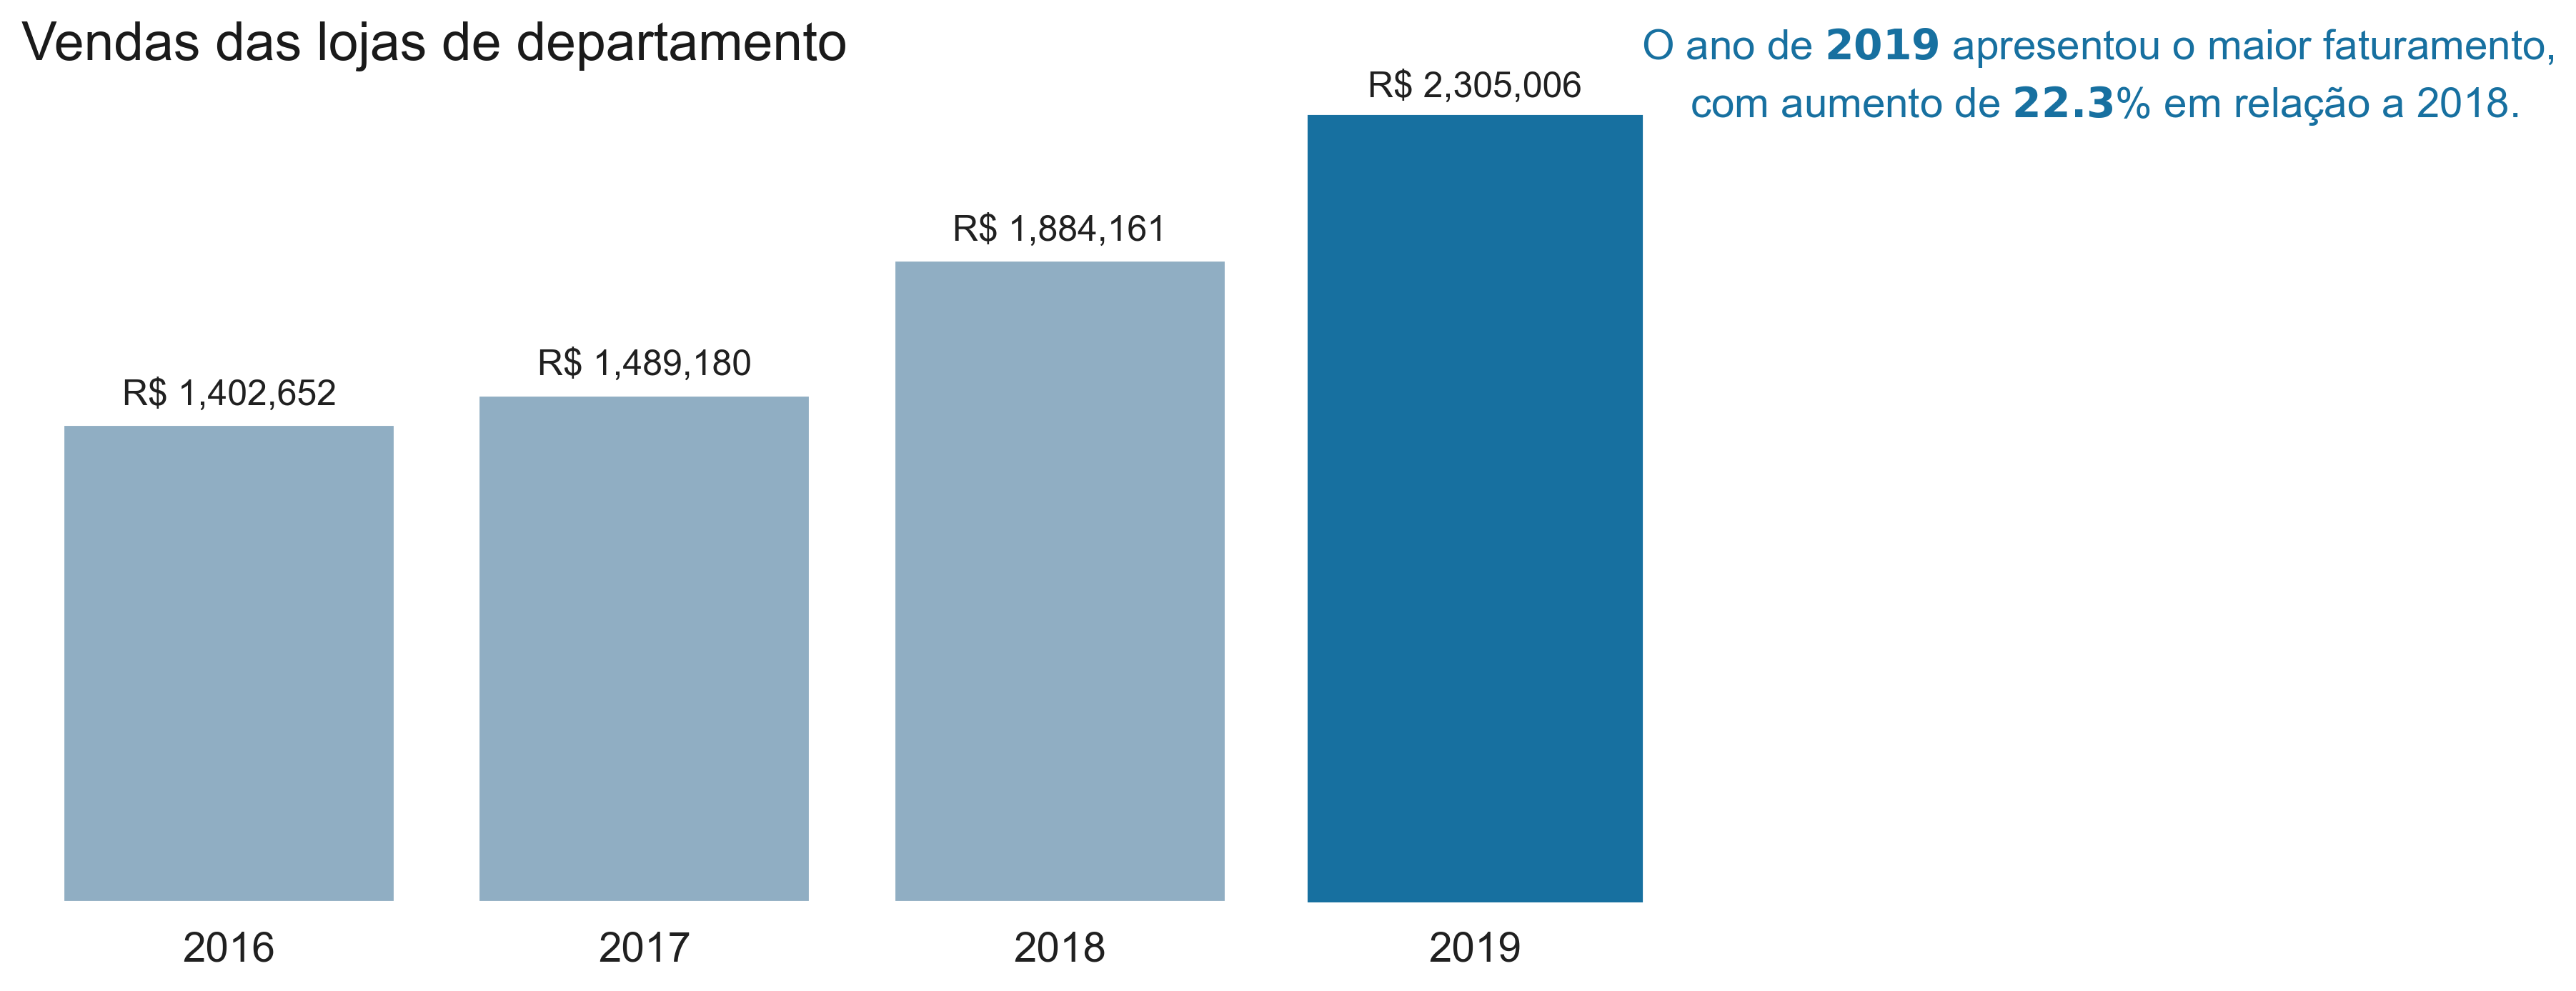

In [102]:
# 1
df_vendas_ano = vendas.groupby(vendas['data_pedido'].dt.year)['vendas'].sum().reset_index()
df_vendas_ano.columns = ['ano', 'total_vendas']
df_vendas_ano   

sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
sns.despine(left=True, right=True, bottom=True)

color_pallete = ['#88b0cb', '#88b0cb', '#88b0cb', '#88b0cb', '#88b0cb']
ax = sns.barplot(data=df_vendas_ano, x='ano', y='total_vendas', palette=color_pallete, ax=ax)
ax.set_title('Vendas das lojas de departamento', fontsize=18, loc='left', color='k')

# Eixo x
ax.set_xlabel('')
ax.xaxis.set_tick_params(labelsize=14, labelcolor='#202020')

# Eixo y
ax.set_ylabel('')
ax.set_yticklabels([])

# Anotando nas barras:
maior_valor = df_vendas_ano['total_vendas'].max()
for p in ax.patches:
    ax.annotate(f'R$ {p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='#202020', xytext=(0, 10), 
                textcoords='offset points')
    if p.get_height() == maior_valor:
        p.set_color("#1770a0")
    

# Informação textual

info_text = f"O ano de $\\bf{2019}$ apresentou o maior faturamento,\n com aumento de $\\bf{22.3}$% em relação a 2018."

ax.text(4.5, maior_valor, info_text, fontsize=14, color='#1770a0', ha='center', linespacing=1.45)
plt.show()


In [103]:
# 2 - Top 7 produtos que mais apresentaram lucros em nosso catálogo durante o período representado